In [1]:
import string, re, json, pickle, warnings, random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import tensorflow as tf
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# importing the wordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bidi.algorithm import get_display
import arabic_reshaper
from data_preparation import take_a_shower, clean_content_aravec

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./data/offensive_dataset.csv', encoding="utf-16")
data.head()

,Comment,is_off
0,شوف حد ين*** أنت و إيران.,1
1,شوف تيفي قوداتها مع الجن غي بلاتي يجي من مكة,0
2,عجب يتفاوظون على شعوب عربية وعليهم وهىلا تعلم,0
3,ههههههه هاد شوف تيفي اللي حطت عليه مشا فيها,0
4,الرزق يأتي من حيث لا تدري 🙌🏻❤️,0


<Figure size 576x432 with 0 Axes>

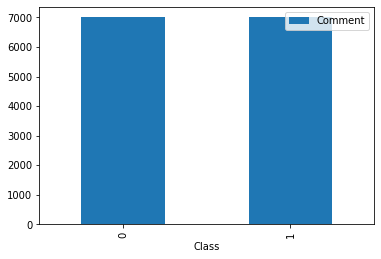

In [3]:
fig = plt.figure(figsize=(8,6))
data.groupby('is_off').count().plot.bar(xlabel='Class')
plt.show()

In [4]:
data.Comment = data.Comment.apply(take_a_shower)
data.shape

(14000, 2)

In [5]:
comments = ' '.join(list(data.Comment))
comments[0:1000]

'شوف حد ايران شوف تيفي قوداتها الجن غي بلاتي يجي مكه عجب يتفاوظون شعوب عربيه وعليهم وهيلا تعلم هه هاد شوف تيفي اللي حطت مشا الرزق ياتي تدري 🙌🏻❤️ دخلو سوق كركم شوفو شكون مكتب عليكم تعيشو عبيد فقراء معا لسسه امبارح بحذركو ولاد الجزمه فيفي ولاد شرموطه هه😂  الله يعفو مسكينه دغيا طارو سصحاب الحسنات باش يستغلوها حرام عليهو الله يخد الحق شوف تفي عواد متسترها شهراتها لناس تفو شحاال حامضه هاد سعييده معرفت علاه كيجيبوها فين ميكون هاد لموسم ديال طنطان يجيبوها لينا يالطيف حد مكيحملها الطلب السعودي جاء ردا الاتهامات الاسراءيليه للسعوديه بقتل الاطفال باليمن اسوه بقتل اسراءيل للاطفال الفلسطينيين جاء تقرير المتحده بلاش فقره الاهداءات وادا لابد خليها نهايه الفيديو احسن وبالتوفيق ياعمر يااربي يااربي تلطف بينا نجم كندا هه روبيني الخرا هه اللهم اشغلهم بانفسهم واجعل كيدهم نحرهم واجعل تدبيرهم تدميرهم ودمرهم تدميرا ومزقهم شر ممزق قوي متين الله ماشي سيمحمد خصها تسميك سوسو المتوحشه 🤣🤣 😂 اين تعليقي ياجزيره اعتقد المنطق الكلام توجد اساء وانما تعقيب كلام امير دوله قطر بتايده بموضوع التطرف الله اسهل عليكم بكيتيني 

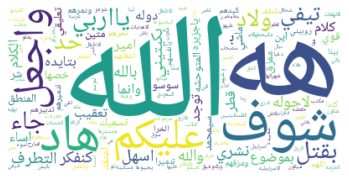

<Figure size 1440x720 with 0 Axes>

In [12]:
# handling arabic text
comments = arabic_reshaper.reshape(comments)
comments = get_display(comments)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
                      max_words=1000,
                      mode='RGBA').generate(comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [13]:
offensive_comments = ' '.join(list(data.Comment.loc[data['is_off'] == 1]))
offensive_comments[0:1000]

'شوف حد ايران دخلو سوق كركم شوفو شكون مكتب عليكم تعيشو عبيد فقراء معا لسسه امبارح بحذركو ولاد الجزمه فيفي ولاد شرموطه هه😂 الله يعفو مسكينه دغيا طارو سصحاب الحسنات باش يستغلوها حرام عليهو الله يخد الحق شوف تفي عواد متسترها شهراتها لناس تفو شحاال حامضه هاد سعييده معرفت علاه كيجيبوها فين ميكون هاد لموسم ديال طنطان يجيبوها لينا يالطيف حد مكيحملها نجم كندا هه روبيني الخرا هه لاحوله بالله كنفكر نشري بقره ونستافذ تفو كمامر لينعل اشطر انك تعليقي مختصر لكل امه زباله وهءلاء زباله السنه اغلب نزحوا كانوا كلاب للحكومه الصفويه الله ناصر جنده وخاذل المرتدين 👎 بالطبع وحكم عسكر الانجليز لمصر واللي مجتمع بمقره البانتاغون ليله سقوط العميل السارق مبارك الله فاش لمار كتهضر فالحق كيكولو انت ناقصه عقل والا غلطات كيردوها مولات لعقل مجتمع منافق متناقض حرامي والمشكل محامي حسرتاه وداير لمنكر التقيه دين الرافضه العب غيرها هه لوين معقول ستر بنت ناس معمرك تخيب اولدي دير قناه ديالك نتي ومرتك وحني طلب را عندك موهبه زوينه تستحق الدفن الرجم محاميه الكسوله بنت لحرام حسبي الله الوكيل الله يقطع الرجال دنيا فحال والله ينعل

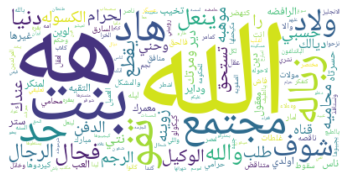

<Figure size 1440x720 with 0 Axes>

In [20]:
# handling arabic text
offensive_comments = arabic_reshaper.reshape(offensive_comments)
offensive_comments = get_display(offensive_comments)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
                      max_words=1000,
                      mode='RGBA').generate(offensive_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

In [21]:
not_offensive_comments = ' '.join(list(data.Comment.loc[data['is_off'] == 0]))
len(not_offensive_comments)

405008

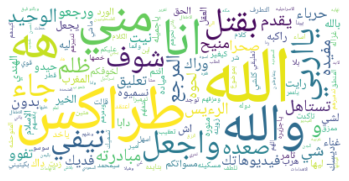

<Figure size 1440x720 with 0 Axes>

In [27]:
# handling arabic text
not_offensive_comments = arabic_reshaper.reshape(not_offensive_comments)
not_offensive_comments = get_display(not_offensive_comments)

wordcloud = WordCloud(font_path='assets/NotoNaskhArabic-Regular.ttf',
                      background_color="white",
                      max_words=1000,
                      mode='RGBA').generate(not_offensive_comments)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.figure(figsize=(20,10))
plt.show()

# LSTM + AraVec Embedding

In [3]:
from keras.models import Model, Sequential
from keras.layers import Dense, Input, Dropout, LSTM, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.initializers import glorot_uniform
from sklearn.preprocessing import LabelEncoder
import gensim

In [4]:
# 60% - train set,
# 20% - validation set,
# 20% - test set
train, validate, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

print(train.shape)
print(validate.shape)
print(test.shape)

X_train = train.Comment
Y_train = train.is_off

X_validate = validate.Comment
Y_validate = validate.is_off

X_test = test.Comment
Y_test = test.is_off

(8400, 2)
(2800, 2)
(2800, 2)


In [5]:
aravec_model = gensim.models.Word2Vec.load('bin/aravec/tweets_sg_100')

In [6]:
# Retrieve the weights from the model. This is used for initializing the weights
# in a Keras Embedding layer later
arvec_weights = aravec_model.wv.vectors
MAX_NB_WORDS, embedding_size = arvec_weights.shape
print("Vocabulary Size: {} - Embedding Dim: {}".format(MAX_NB_WORDS, embedding_size))

Vocabulary Size: 331679 - Embedding Dim: 100


In [7]:
MAX_SEQUENCE_LENGTH = 85 #176 # based on our inputs; TODO: remove outliers? dynamically calculate!
EMBEDDING_DIM = 100 # w2v, fastText; GloVe=50

In [8]:
tokenize = Tokenizer(num_words=MAX_NB_WORDS)
tokenize.fit_on_texts(X_train)
sequences = tokenize.texts_to_sequences(X_train)
word_index = tokenize.word_index
print('Found %s unique tokens.' % len(word_index))
sequences_matrix = sequence.pad_sequences(sequences,maxlen=MAX_SEQUENCE_LENGTH)
print(sequences_matrix.shape)

Found 44786 unique tokens.
(8400, 85)


In [9]:
num_words = min(MAX_NB_WORDS, len(word_index)) + 1
num_words

44787

In [10]:
def create_embedding_matrix(word_index):
    nb_words = min(MAX_NB_WORDS, len(word_index))+1
    embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
    for word, ii in word_index.items():
        if word in aravec_model.wv.vocab:
            embedding_matrix[ii] = aravec_model.wv.word_vec(word)
    return embedding_matrix

embedding_matrix = create_embedding_matrix(word_index)
print(embedding_matrix.shape)

(44787, 100)


In [11]:
embedding_layer = aravec_model.wv.get_keras_embedding(train_embeddings=False)
print(embedding_layer.input_dim)
print(embedding_layer.output_dim)

331679
100


In [60]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
def get_callbacks(weights_filepath):
    checkpoint = ModelCheckpoint(filepath=weights_filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early_stopping = EarlyStopping(monitor='val_loss', patience=4)
    callbacks = [checkpoint, early_stopping]
    return callbacks

In [12]:
num_words

44787

In [13]:
lstm_model = Sequential()

# Keras Embedding layer with Word2Vec weights initialization
lstm_model.add(Embedding(input_dim=num_words,
                    output_dim=EMBEDDING_DIM,
                    weights=[embedding_matrix],
                    input_length=MAX_SEQUENCE_LENGTH,
                    mask_zero=True,
                    trainable=False))

lstm_model.add(LSTM(128, return_sequences=True))
lstm_model.add(Dropout(0.5))
lstm_model.add(LSTM(128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(2, activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
sentence_indices = Input(shape=(MAX_SEQUENCE_LENGTH,),dtype='int32')
embeddings = embedding_layer(sentence_indices)   
# Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
# Returned output should be a batch of sequences.
X = LSTM(128, return_sequences=True)(embeddings)
X = Dropout(0.5)(X)
# Returned output should be a single hidden state, not a batch of sequences.
X = LSTM(128)(X)
X = Dropout(0.5)(X)
X = Dense(2)(X)
X = Activation('softmax')(X)
lstm_model = Model(inputs=sentence_indices,outputs=X)

In [18]:
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # loss='categorical_crossentropy'

In [14]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 85, 100)           4478700   
_________________________________________________________________
lstm (LSTM)                  (None, 85, 128)           117248    
_________________________________________________________________
dropout (Dropout)            (None, 85, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 4,727,790
Trainable params: 249,090
Non-trainable params: 4,478,700
________________________________________

In [19]:
lstm_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 85)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 85, 100)           33167900  
_________________________________________________________________
lstm_2 (LSTM)                (None, 85, 128)           117248    
_________________________________________________________________
dropout_2 (Dropout)          (None, 85, 128)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258   

In [15]:
tokenize.fit_on_texts(X_validate)
val_sequences = tokenize.texts_to_sequences(X_validate)
val_word_index = tokenize.word_index
print('Found %s unique tokens.' % len(val_word_index))
val_sequences_matrix = sequence.pad_sequences(val_sequences,maxlen=MAX_SEQUENCE_LENGTH)
print(val_sequences_matrix.shape)

Found 54713 unique tokens.
(2800, 85)


In [25]:
y_train_en.shape

(8400,)

In [20]:
history = lstm_model.fit(sequences_matrix, Y_train, epochs=10, batch_size=32, validation_data=(val_sequences_matrix, Y_validate), verbose=1)

Epoch 1/10
263/263 [==============================] - 8s 31ms/step - loss: 0.6597 - accuracy: 0.6096 - val_loss: 0.6640 - val_accuracy: 0.5757
Epoch 2/10
263/263 [==============================] - 8s 29ms/step - loss: 0.6361 - accuracy: 0.6348 - val_loss: 0.6658 - val_accuracy: 0.5843
Epoch 3/10
263/263 [==============================] - 8s 29ms/step - loss: 0.6160 - accuracy: 0.6575 - val_loss: 0.6530 - val_accuracy: 0.6121
Epoch 4/10
263/263 [==============================] - 8s 29ms/step - loss: 0.5966 - accuracy: 0.6713 - val_loss: 0.6644 - val_accuracy: 0.6036
Epoch 5/10
263/263 [==============================] - 8s 29ms/step - loss: 0.5715 - accuracy: 0.6936 - val_loss: 0.6645 - val_accuracy: 0.6182
Epoch 6/10
263/263 [==============================] - 8s 29ms/step - loss: 0.5405 - accuracy: 0.7151 - val_loss: 0.7104 - val_accuracy: 0.5764
Epoch 7/10
263/263 [==============================] - 8s 29ms/step - loss: 0.5071 - accuracy: 0.7405 - val_loss: 0.9006 - val_accuracy: 0.6182

In [23]:
test_sequences = tokenize.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=MAX_SEQUENCE_LENGTH)
print(lstm_model.evaluate(test_sequences_matrix,Y_test))

88/88 [==============================] - 1s 11ms/step - loss: 1.0693 - accuracy: 0.5761
[1.0692685842514038, 0.5760714411735535]


In [24]:
y_pred = lstm_model.predict(test_sequences_matrix, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_pred = (y_pred > 0.5)
print('\n')

88/88 [==============================] - 1s 10ms/step




In [25]:
print(classification_report(Y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.57      0.61      0.59      1407
           1       0.58      0.54      0.56      1393

    accuracy                           0.58      2800
   macro avg       0.58      0.58      0.58      2800
weighted avg       0.58      0.58      0.58      2800



In [27]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


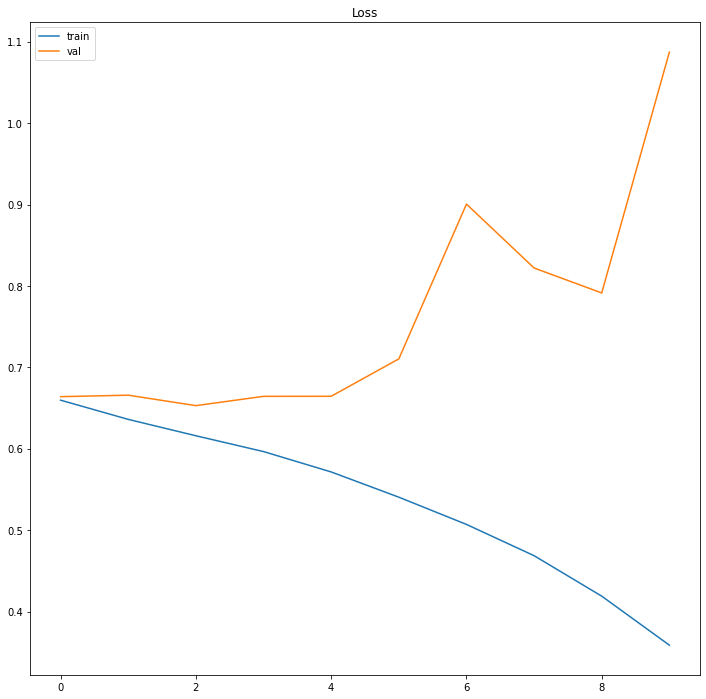

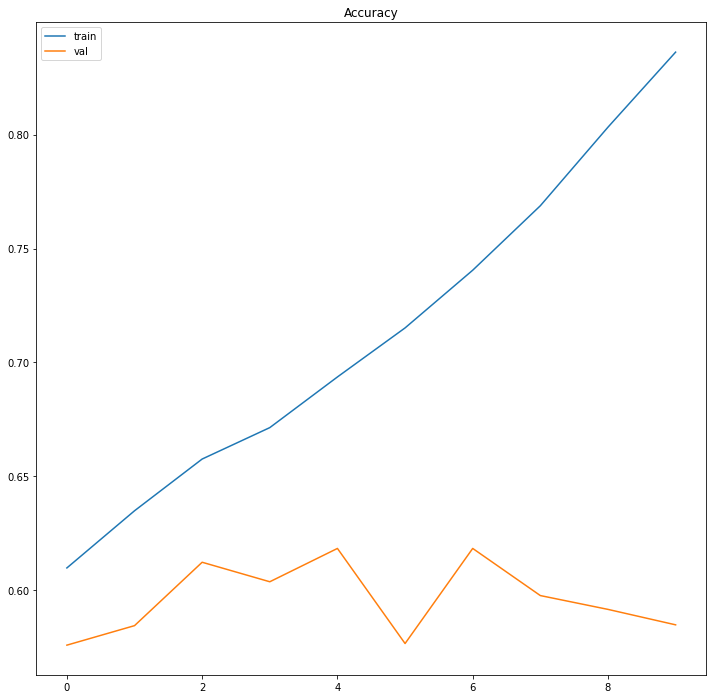

In [28]:
# Plotting Loss and Accuracy Graphs
plt.figure(figsize=(12, 12))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.figure(figsize=(12, 12))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [147]:
history.history

{'loss': [0.640994668006897,
  0.6055136919021606,
  0.575839638710022,
  0.5504686832427979,
  0.5136207342147827],
 'accuracy': [0.642589271068573,
  0.676964282989502,
  0.6924107074737549,
  0.711517870426178,
  0.7403571605682373]}

# LSTM With FASTTEXT Embedding

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, Dropout, Input#, LSTM, Bidirectional
from tensorflow.keras.layers import MaxPooling1D, Conv1D, Flatten, LSTM
from tensorflow.keras.preprocessing import sequence#, text
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
# from tensorflow.keras.utils import np_utils
from tensorflow.keras.callbacks import Callback


from gensim.models.keyedvectors import KeyedVectors

from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix as confmat,
    classification_report as creport
)

In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding,GRU,LSTM,Dense,Dropout,Bidirectional,BatchNormalization,GlobalMaxPooling1D,Flatten, GlobalAveragePooling1D, MaxPooling1D,SpatialDropout1D,Input,Activation,concatenate,Conv1D
from tensorflow.keras.optimizers import RMSprop,Adam,Adadelta
from tensorflow.keras.initializers import Constant
from sklearn.utils import class_weight
from sklearn.metrics import classification_report,f1_score
import csv
import collections
import numpy as np
import tensorflow as tf

In [24]:
data

,Comment,is_off
0,شوف حد ايران,1
1,شوف تيفي قوداتها الجن غي بلاتي يجي مكه,0
2,عجب يتفاوظون شعوب عربيه وعليهم وهيلا تعلم,0
3,هه هاد شوف تيفي اللي حطت مشا,0
4,الرزق ياتي تدري 🙌🏻❤️,0
...,...,...
13995,وانشا حنا مسلمين كلاب اس هادا اشي كيعلوا اولاد...,1
13996,《 واذا قيل اتق الله اخذته العزه بالاثم فحسبه ج...,0
13997,الله يرضي عليكون زهران علوش وابو النصر متهمين ...,0
13998,الفلوس دفعوها خلصت كله بثمنه عايزين تدخل اكبر ...,0


In [26]:
# 60% - train set,
# 20% - validation set,
# 20% - test set
train, validate, test = np.split(data.sample(frac=1, random_state=42), [int(.6*len(data)), int(.8*len(data))])

print(train.shape)
print(validate.shape)
print(test.shape)

X_train = train.Comment
Y_train = train.is_off

X_validate = validate.Comment
Y_validate = validate.is_off

X_test = test.Comment
Y_test = test.is_off

In [34]:
Y_train

2900     1
3143     1
8231     1
3855     0
8045     1
        ..
7371     1
9438     0
5594     0
10503    1
9599     1
Name: is_off, Length: 8400, dtype: int64

In [35]:
max_words = 10000 #frequency of words to be kept
max_len = 200

tokenize = Tokenizer(num_words=max_words)
tokenize.fit_on_texts(X_train)
sequences = tokenize.texts_to_sequences(X_train)
word_index = tokenize.word_index

In [36]:
num_words = min(max_words, len(word_index)) + 1
print(num_words)

10001


In [37]:
train_sequences = sequence.pad_sequences(sequences,maxlen=max_len,padding='post')
val_sequences = tokenize.texts_to_sequences(X_validate)
val_sequences = sequence.pad_sequences(val_sequences,maxlen=max_len,padding='post')
test_sequences = tokenize.texts_to_sequences(X_test)
test_sequences = sequence.pad_sequences(test_sequences,maxlen=max_len,padding='post')
len(test_sequences)

2800

In [38]:
embed_size=300
def get_coefs(word,*arr):
    return word, np.asarray(arr, dtype='float32')

def build_matrix(embedding_path, word_index):
    embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(embedding_path))

    nb_words = min(max_words, len(word_index))
    embedding_matrix = np.zeros((nb_words + 1, embed_size))
    for word, i in word_index.items():
        if i >= max_words:
            continue
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

In [39]:
embeddings=build_matrix('./bin/fasttext/cc.ar.300.vec', word_index)
embeddings.shape

(10001, 300)

In [42]:
inp = Input(shape=(max_len,))
x = Embedding(num_words,embed_size,embeddings_initializer=Constant(embeddings),input_length=max_len,trainable=False)(inp)
x = SpatialDropout1D(0.1)(x)
x = Bidirectional(LSTM(50, return_sequences=True))(x)
x, x_h, x_c = Bidirectional(GRU(50, return_sequences=True, return_state = True))(x)
avg_pool = GlobalAveragePooling1D()(x)
max_pool = GlobalMaxPooling1D()(x)
conc = concatenate([avg_pool, x_h, max_pool])
outp = Dense(1, activation="sigmoid")(conc)    
gru_model = Model(inputs=inp, outputs=outp)
gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
gru_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 200, 300)     3000300     input_3[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_2 (SpatialDro (None, 200, 300)     0           embedding_2[0][0]                
__________________________________________________________________________________________________
bidirectional_3 (Bidirectional) (None, 200, 100)     140400      spatial_dropout1d_2[0][0]        
____________________________________________________________________________________________

In [46]:
gru_model.fit(train_sequences,Y_train, batch_size=16, epochs=10, verbose=2, validation_data=(val_sequences,Y_validate))

Epoch 1/10


UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[model_1/bidirectional_3/forward_lstm_2/StatefulPartitionedCall]] [Op:__inference_train_function_10938]

Function call stack:
train_function -> train_function -> train_function
